In [85]:
import numpy as np
import pandas as pd
from typing import List
import seaborn as sns


In [2]:
df = pd.read_csv('US_Accidents_Dec19.csv')

In [7]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [5]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.246264e+06,2.974335e+06,2.974335e+06,2.974335e+06,728071.000000,728071.000000,2.974335e+06,1.056730e+06,2.918272e+06,1.121712e+06,2.915162e+06,2.926193e+06,2.908644e+06,2.533495e+06,975977.000000
mean,2.078316e+02,2.360190e+00,3.649361e+01,-9.542625e+01,37.580871,-99.976032,2.855654e-01,5.837004e+03,6.235120e+01,5.132685e+01,6.540542e+01,2.983190e+01,9.150770e+00,8.298064e+00,0.020495
std,2.032959e+01,5.414733e-01,4.918849e+00,1.721881e+01,5.004757,18.416647,1.548392e+00,1.515928e+04,1.878855e+01,2.519127e+01,2.255676e+01,7.213808e-01,2.892114e+00,5.138546e+00,0.235770
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,24.570110,-124.497829,0.000000e+00,0.000000e+00,-7.780000e+01,-6.590000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.010000e+02,2.000000e+00,3.355040e+01,-1.172920e+02,33.957554,-118.286610,0.000000e+00,8.370000e+02,5.000000e+01,3.200000e+01,4.900000e+01,2.982000e+01,1.000000e+01,4.600000e+00,0.000000
50%,2.010000e+02,2.000000e+00,3.584969e+01,-9.025083e+01,37.903670,-96.631690,0.000000e+00,2.717000e+03,6.440000e+01,5.400000e+01,6.700000e+01,2.998000e+01,1.000000e+01,7.000000e+00,0.000000
75%,2.010000e+02,3.000000e+00,4.037026e+01,-8.091891e+01,41.372630,-82.323850,1.000000e-02,7.000000e+03,7.600000e+01,7.300000e+01,8.400000e+01,3.011000e+01,1.000000e+01,1.040000e+01,0.000000
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,25.000000


In [8]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
df[['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng']]

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2974330,A-2974354,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094
2974331,A-2974355,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363
2974332,A-2974356,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727
2974333,A-2974357,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565


In [13]:
df['Source'].unique()

array(['MapQuest', 'MapQuest-Bing', 'Bing'], dtype=object)

In [14]:
df['TMC'].unique()

array([201., 241., 247., 246., 341., 406., 245., 248., 200., 244., 203.,
       229., 222., 202., 206., 343., 236., 239., 336., 339., 351.,  nan])

In [15]:
df['Severity'].unique()

array([3, 2, 1, 4], dtype=int64)

In [16]:
df.drop(['ID', 'Source', 'TMC', 'End_Lat', 'End_Lng'], axis=1, inplace=True)

In [17]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [18]:
df[['Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country']].head()

,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country
0,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US
1,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US
2,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US
3,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US
4,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US


In [22]:
df[['Distance(mi)']].describe()

,Distance(mi)
count,2.974335e+06
mean,2.855654e-01
std,1.548392e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e-02
max,3.336300e+02


In [23]:
df['Country'].unique()

array(['US'], dtype=object)

In [24]:
df.drop(['Distance(mi)', 'Number', 'Street', 'Side', 'County', 'Zipcode', 'Country'], axis=1, inplace=True)

In [25]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Description', 'City', 'State', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [26]:
df[['Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)']]

,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph)
0,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN
1,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN
2,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5
3,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6
4,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5
...,...,...,...,...,...,...,...,...,...,...
2974330,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0
2974331,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0
2974332,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0
2974333,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0


In [27]:
df.drop(['Timezone', 'Airport_Code', 'Weather_Timestamp'], axis=1, inplace=True)

In [28]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Description', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [30]:
df[['Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout',]].head()

,Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout
0,0.02,Light Rain,False,False,False,False,False,False,False,False
1,0.00,Light Rain,False,False,False,False,False,False,False,False
2,NaN,Overcast,False,False,False,False,False,False,False,False
3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False
4,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False


In [31]:
df[['Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']].head()

,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,Night,Night,Night,Night
1,False,False,False,False,False,Night,Night,Night,Day
2,False,False,False,True,False,Night,Night,Day,Day
3,False,False,False,False,False,Night,Day,Day,Day
4,False,False,False,True,False,Day,Day,Day,Day


In [32]:
df.drop(['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1, inplace=True)

In [33]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Description', 'City', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 31 columns):
Severity             int64
Start_Time           object
End_Time             object
Start_Lat            float64
Start_Lng            float64
Description          object
City                 object
State                object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction       object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition    object
Amenity              bool
Bump                 bool
Crossing             bool
Give_Way             bool
Junction             bool
No_Exit              bool
Railway              bool
Roundabout           bool
Station              bool
Stop                 bool
Traffic_Calming      bool
Traffic_Signal       bool
Turning_Loop         bool
Sunrise_Sunset       object
dtypes: bool(13), float64(9), int64(1

In [38]:
def to_celsius(temperature: float) -> float:
    return round((temperature - 32.) * 5./9., 2)

In [39]:
to_celsius(65.)

18.33

In [40]:
df['Temperature(C)'] = df['Temperature(F)'].apply(to_celsius)
df['Temperature(C)'].head()

0    2.72
1    3.28
2    2.22
3    1.72
4    2.22
Name: Temperature(C), dtype: float64

In [45]:
df['Wind_Chill(C)'] = df['Wind_Chill(F)'].apply(to_celsius)
df['Wind_Chill(C)'].head()

0     NaN
1     NaN
2    0.72
3   -0.56
4    0.72
Name: Wind_Chill(C), dtype: float64

In [49]:
df.drop(['Wind_Chill(F)', 'Temperature(F)'], axis=1, inplace=True)

In [50]:
def to_mbar(pressure: float) -> float:
    return round(pressure * 33.8639, 2)

In [51]:
df['Pressure(mbar)'] = df['Pressure(in)'].apply(to_mbar)
df['Pressure(mbar)'].head()

0    1005.08
1    1004.06
2    1004.74
3    1003.73
4    1004.06
Name: Pressure(mbar), dtype: float64

In [52]:
df.drop(['Pressure(in)'], axis=1, inplace=True)

In [53]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Description,City,State,Humidity(%),Visibility(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Temperature(C),Wind_Chill(C),Pressure(mbar)
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,Right lane blocked due to accident on I-70 Eas...,Dayton,OH,91.0,10.0,...,False,False,False,False,False,False,Night,2.72,NaN,1005.08
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,Accident on Brice Rd at Tussing Rd. Expect del...,Reynoldsburg,OH,100.0,10.0,...,False,False,False,False,False,False,Night,3.28,NaN,1004.06
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,Accident on OH-32 State Route 32 Westbound at ...,Williamsburg,OH,100.0,10.0,...,False,False,False,False,True,False,Night,2.22,0.72,1004.74
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,Accident on I-75 Southbound at Exits 52 52B US...,Dayton,OH,96.0,9.0,...,False,False,False,False,False,False,Night,1.72,-0.56,1003.73
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Dayton,OH,89.0,6.0,...,False,False,False,False,True,False,Day,2.22,0.72,1004.06


In [55]:
def to_kilometers(miles: float) -> float:
    return round(miles * 1.609, 3)

In [56]:
df['Visibility(km)'] = df['Visibility(mi)'].apply(to_kilometers)

In [57]:
df.drop('Visibility(mi)', axis=1, inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 31 columns):
Severity             int64
Start_Time           object
End_Time             object
Start_Lat            float64
Start_Lng            float64
Description          object
City                 object
State                object
Humidity(%)          float64
Wind_Direction       object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition    object
Amenity              bool
Bump                 bool
Crossing             bool
Give_Way             bool
Junction             bool
No_Exit              bool
Railway              bool
Roundabout           bool
Station              bool
Stop                 bool
Traffic_Calming      bool
Traffic_Signal       bool
Turning_Loop         bool
Sunrise_Sunset       object
Temperature(C)       float64
Wind_Chill(C)        float64
Pressure(mbar)       float64
Visibility(km)       float64
dtypes: bool(13), float64(9), int64(1

In [62]:
df[['Precipitation(in)', 'Wind_Speed(mph)']].nunique()

Precipitation(in)    256
Wind_Speed(mph)      147
dtype: int64

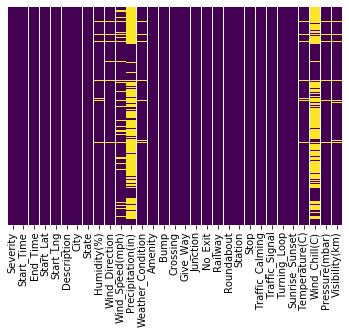

In [64]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [70]:
# df.drop(['Precipitation(in)', 'Wind_Chill(C)'], axis=1, inplace=True)

In [77]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [91]:
df.groupby(by='Weather_Condition')['Humidity(%)'].mean()

Weather_Condition
Blowing Dust               10.840909
Blowing Dust / Windy       14.921875
Blowing Sand               30.000000
Blowing Snow               68.966418
Blowing Snow / Windy       75.200000
                             ...    
Volcanic Ash               46.095238
Widespread Dust            19.007752
Widespread Dust / Windy    44.000000
Wintry Mix                 89.528822
Wintry Mix / Windy         84.900000
Name: Humidity(%), Length: 120, dtype: float64

In [92]:
df[df['Weather_Condition'] == 'Blowing Dust']['Humidity(%)'].mean()

10.840909090909092

In [76]:
df[df['Weather_Condition'] == 'Blowing Dust']['Humidity(%)'].nunique()

13

In [93]:
for weather in df['Weather_Condition'].unique():
    df[df['Weather_Condition'] == weather]['Humidity(%)'].fillna(
        df[df['Weather_Condition'] == weather]['Humidity(%)'].mean())

In [94]:
df[df['Weather_Condition'] == 'Blowing Dust']['Humidity(%)'].nunique()

13

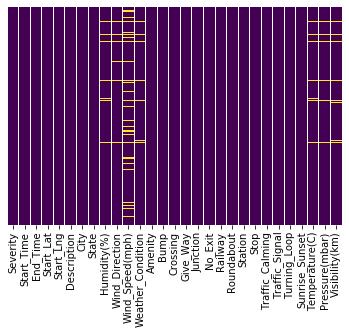

In [96]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')